In [1]:
%matplotlib inline
from __future__ import division  # just in case you are still using python2
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit as logistic
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

#### Code 10.1

In [2]:
d = pd.read_csv('Data/chimpanzees.csv', sep=";")

#### Code 10.2

In [3]:
with pm.Model() as model_10_1:
    a = pm.Normal('a', 0, 10)
    p = pm.math.invlogit(a)
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d['pulled_left'])

    trace_10_1 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 349.03:   4%|▍         | 8085/200000 [00:01<00:26, 7245.66it/s]
Convergence archived at 8500
Interrupted at 8,500 [4%]: Average Loss = 356.63
100%|██████████| 2500/2500 [00:01<00:00, 1618.18it/s]


In [4]:
df_10_1 = pm.df_summary(trace_10_1, alpha=0.11)
df_10_1

,mean,sd,mc_error,hpd_5.5,hpd_94.5
a,0.320542,0.090116,0.002605,0.173468,0.461414


#### Code 10.3

In [5]:
logistic(df_10_1.iloc[:,-2:])

,hpd_5.5,hpd_94.5
a,0.543259,0.613349


#### Code 10.4

In [6]:
with pm.Model() as model_10_2:
    a = pm.Normal('a', 0, 10)
    bp = pm.Normal('bp', 0, 10)
    p = pm.math.invlogit(a + bp * d['prosoc_left'])
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d['pulled_left'])

    trace_10_2 = pm.sample(2000)

with pm.Model() as model_10_3:
    a = pm.Normal('a', 0, 10)
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    p = pm.math.invlogit(a + (bp + bpC * d['condition']) * d['prosoc_left'])
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d['pulled_left'])

    trace_10_3 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 349.6:   4%|▍         | 8298/200000 [00:02<00:50, 3762.50it/s] 
Convergence archived at 8300
Interrupted at 8,300 [4%]: Average Loss = 361.4
100%|██████████| 2500/2500 [00:05<00:00, 447.19it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 352.54:   5%|▌         | 10029/200000 [00:03<01:00, 3135.60it/s]
Convergence archived at 10100
Interrupted at 10,100 [5%]: Average Loss = 364.77
100%|██████████| 2500/2500 [00:08<00:00, 297.33it/s]


#### Code 10.5

In [7]:
comp_df = pm.compare(traces=[trace_10_1, trace_10_2, trace_10_3], models=[model_10_1, model_10_2, model_10_3])
comp_df.round(2)

,WAIC,pWAIC,dWAIC,weight,SE,dSE,warning
1,680.511,2.00585,0,0.737098,9.38833,0,0
2,682.714,3.1865,2.20361,0.244916,9.50879,0.0293049,0
0,687.937,0.99843,7.42624,0.0179861,7.1191,1.75409,0


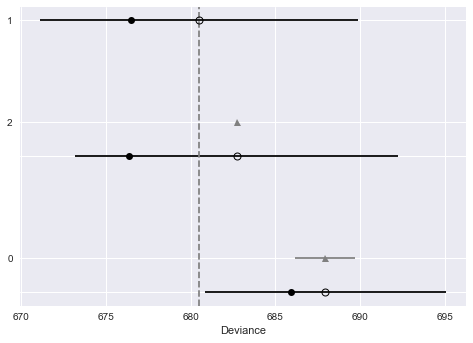

In [8]:
pm.compareplot(comp_df);

#### Code 10.6

In [9]:
pm.df_summary(trace_10_3).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,0.05,0.13,0.00,-0.19,0.31
bp,0.61,0.24,0.01,0.15,1.08
bpC,-0.10,0.28,0.01,-0.61,0.48


#### Code 10.7

In [10]:
np.exp(0.61)

1.8404313987816374

#### Code 10.8

In [11]:
logistic(4)

0.98201379003790845

#### Code 10.9

In [12]:
logistic(4 + 0.61)

0.99014624447676869

#### Code 10.10

In [13]:
d_pred = pd.DataFrame({'prosoc_left' : [0, 1, 0, 1], 'condition' : [0, 0, 1, 1]})

# MODEL ENSEMBLE

#### Code 10.11

In [14]:
# PLOTTING

#### Code 10.12 & 10.13
This is the same as 10.6, but in the book using MCMC rather than quadratic approximation.

#### Code 10.14

In [15]:
# indices are 0 indexed
d['actor_0'] = d['actor'] - 1

with pm.Model() as model_10_4:
    a = pm.Normal('alpha', 0, 10, shape=len(d['actor'].unique()))
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    p = pm.math.invlogit(a[d['actor_0'].values] + (bp + bpC*d['condition'])*d['prosoc_left'] )
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d['pulled_left'])

    trace_10_4 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 288.51:  11%|█▏        | 22838/200000 [00:07<00:59, 2973.17it/s]
Convergence archived at 23100
Interrupted at 23,100 [11%]: Average Loss = 303.81
100%|██████████| 2500/2500 [00:15<00:00, 156.60it/s]


#### Code 10.15

In [16]:
# This is just a mapping from 1-index to 0-index vals
dict(zip(d['actor'].unique(), d['actor_0'].unique()))

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6}

#### Code 10.16

In [17]:
pm.df_summary(trace_10_4, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5
alpha__0,-0.74,0.26,0.01,-1.11,-0.31
alpha__1,11.18,5.67,0.31,3.67,19.27
alpha__2,-1.05,0.28,0.01,-1.47,-0.59
alpha__3,-1.04,0.27,0.01,-1.46,-0.60
alpha__4,-0.73,0.28,0.01,-1.16,-0.29
alpha__5,0.22,0.26,0.00,-0.17,0.67
alpha__6,1.81,0.40,0.01,1.21,2.44
bp,0.84,0.26,0.01,0.39,1.22
bpC,-0.14,0.29,0.01,-0.61,0.30


#### Code 10.7

In [18]:
post = pm.trace_to_dataframe(trace_10_4)
post.head()

,bp,alpha__0,alpha__1,alpha__2,alpha__3,alpha__4,alpha__5,alpha__6,bpC
0,0.661176,-0.899297,6.395335,-1.012638,-1.138821,-0.360087,0.589264,0.432569,-0.037871
1,0.579221,-0.660346,6.609983,-0.651408,-1.322949,-0.919465,0.415787,2.137415,0.409617
2,0.361839,-0.271379,6.628812,-1.141547,-1.380073,-0.360942,0.199943,1.706148,0.107964
3,0.906468,-1.064950,10.358911,-0.814536,-0.595922,-0.966513,0.378236,1.974581,-0.490946
4,0.607095,-0.546842,14.803244,-1.007331,-1.244998,-1.086006,0.350347,2.032545,0.206660


#### Code 10.18

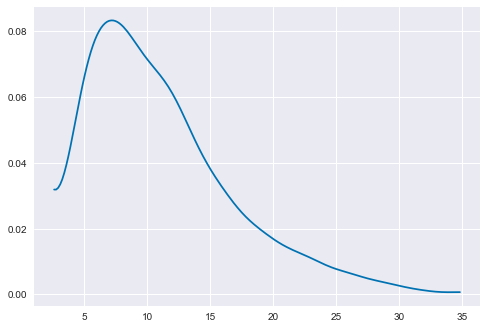

In [19]:
pm.kdeplot(post['alpha__1']);

#### Code 10.19

In [20]:
# Posterior Prediction Plots

#### Code 10.20

In [21]:
d_aggregated = d.groupby(['actor', 'condition', 'prosoc_left',  ])['pulled_left'].sum().reset_index()

#### Code 10.21

In [22]:
# indices are 0 indexed
d['actor_0'] = d['actor'] - 1

with pm.Model() as model_10_5:
    a = pm.Normal('alpha', 0, 10)
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    p = pm.math.invlogit(a + (bp + bpC*d_aggregated['condition'])*d_aggregated['prosoc_left'] )
    pulled_left = pm.Binomial('pulled_left', 18, p, observed=d_aggregated['pulled_left'])

    trace_10_5 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 142.68:   5%|▍         | 9581/200000 [00:01<00:29, 6428.12it/s]
Convergence archived at 10100
Interrupted at 10,100 [5%]: Average Loss = 154.68
100%|██████████| 2500/2500 [00:03<00:00, 657.42it/s]


In [23]:
pm.df_summary(trace_10_5)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,0.046022,0.127651,0.003339,-0.218562,0.277854
bp,0.617771,0.229220,0.007033,0.171571,1.026437
bpC,-0.111843,0.264856,0.007116,-0.613489,0.399010


In [24]:
# hacky check of similarity to 10_3, within a hundreth
np.isclose(pm.df_summary(trace_10_5), pm.df_summary(trace_10_3), atol=0.01)

array([[ True,  True,  True, False, False],
       [ True,  True,  True, False, False],
       [ True, False,  True,  True, False]], dtype=bool)

#### Code 10.22

In [25]:
d = pd.read_csv('./Data/UCBadmit.csv', sep=';')
d

,dept,applicant.gender,admit,reject,applications
1,A,male,512,313,825
2,A,female,89,19,108
3,B,male,353,207,560
4,B,female,17,8,25
5,C,male,120,205,325
6,C,female,202,391,593
7,D,male,138,279,417
8,D,female,131,244,375
9,E,male,53,138,191
10,E,female,94,299,393


#### Code 10.23

In [26]:
d['male'] = (d['applicant.gender'] == 'male').astype(int)

with pm.Model() as model_10_6:
    a = pm.Normal('a', 0, 10)
    bm = pm.Normal('bm', 0, 10)
    p = pm.math.invlogit(a + bm*d['male'])
    admit = pm.Binomial('admit', p=p, n=d['applications'], observed=d['admit'])
    
    trace_10_6 = pm.sample(2000)
    
with pm.Model() as model_10_7:
    a = pm.Normal('a', 0, 10)
    p = pm.math.invlogit(a)
    admit = pm.Binomial('admit', p=p, n=d['applications'], observed=d['admit'])
    
    trace_10_7 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 460.16:   5%|▌         | 10071/200000 [00:01<00:26, 7129.47it/s]
Convergence archived at 10200
Interrupted at 10,200 [5%]: Average Loss = 603.42
100%|██████████| 2500/2500 [00:02<00:00, 893.23it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 491.02:   4%|▍         | 8961/200000 [00:01<00:23, 8143.97it/s]
Convergence archived at 9700
Interrupted at 9,700 [4%]: Average Loss = 566.9
100%|██████████| 2500/2500 [00:01<00:00, 1467.97it/s]


#### Code 10.24

In [27]:
# Something goofy here... 
# not even close to WAIC values, larger standard error

comp_df = pm.compare(traces=[trace_10_6, trace_10_7], models=[model_10_6, model_10_7])
comp_df

,WAIC,pWAIC,dWAIC,weight,SE,dSE,warning
0,985.364,111.225,0,1,309.984,0,1
1,1059.02,91.227,73.6561,1.01341e-16,318.694,7570.07,1


#### Code 10.25

In [28]:
pm.df_summary(trace_10_6)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a,-0.828383,0.050765,0.002171,-0.927574,-0.732577
bm,0.606661,0.063442,0.002820,0.475581,0.721417


#### Code 10.26

In [31]:
post = pm.trace_to_dataframe(trace_10_6)
p_admit_male = logistic(post['a'] + post['bm'])
p_admit_female = logistic(post['a'])
diff_admit = p_admit_male - p_admit_female
diff_admit.describe(percentiles=[.025, .5, .975])

count    2000.000000
mean        0.140722
std         0.014275
min         0.100471
2.5%        0.112610
50%         0.140886
97.5%       0.168409
max         0.191535
dtype: float64

#### Code 10.27

In [ ]:
# Posterior Predictive Check Plotting

#### Code 10.28

In [32]:
depts = d['dept'].unique()
dept_index = dict(zip(depts, range(len(depts))))
d['dept_id'] = d['dept'].map(dept_index)
for dept in dept_index:
    print(dept, dept_index[dept])

B 1
A 0
E 4
D 3
C 2
F 5


⚠️ Note when doing this index mapping, you need to append `.values` to the indexed values in the model, otherwise you'll get:

```
TypeError: invalid type comparison```

In [33]:
with pm.Model() as model_10_8:
    a = pm.Normal('a', 0, 10, shape=len(depts))
    p = pm.math.invlogit(a[d['dept_id'].values])
    admit = pm.Binomial('admit', p=p, n=d['applications'], observed=d['admit'])
    
    trace_10_8 = pm.sample(2000)

with pm.Model() as model_10_9:
    a = pm.Normal('a', 0, 10, shape=len(depts))
    bm = pm.Normal('bm', 0, 10)
    p = pm.math.invlogit(a[d['dept_id'].values] + bm*d['male'])
    admit = pm.Binomial('admit', p=p, n=d['applications'], observed=d['admit'])
    
    trace_10_9 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 77.036:   5%|▌         | 10862/200000 [00:01<00:25, 7351.28it/s]
Convergence archived at 10900
Interrupted at 10,900 [5%]: Average Loss = 241.73
100%|██████████| 2500/2500 [00:03<00:00, 737.89it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 86.999:   5%|▌         | 10677/200000 [00:01<01:19, 2387.24it/s]
Convergence archived at 11000
Interrupted at 11,000 [5%]: Average Loss = 282.47
100%|██████████| 2500/2500 [00:04<00:00, 597.40it/s]


#### Code 10.29

In [34]:
# WAIC values still off
# Plus warning flag

comp_df = pm.compare(traces=[trace_10_6, trace_10_7, trace_10_8, trace_10_9], models=[model_10_6, model_10_7, model_10_8, model_10_9])
comp_df

,WAIC,pWAIC,dWAIC,weight,SE,dSE,warning
2,104.862,6.43161,0,0.85756,17.161,0,1
3,108.452,9.43187,3.59034,0.14244,15.4138,4.18028,1
0,985.364,111.225,880.502,5.42732e-192,309.984,27192.7,1
1,1059.02,91.227,954.159,5.50012e-208,318.694,28864.2,1


#### Code 10.30

In [35]:
pm.df_summary(trace_10_9).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
a__0,0.68,0.10,0.0,0.50,0.88
a__1,0.64,0.12,0.0,0.41,0.86
a__2,-0.58,0.08,0.0,-0.73,-0.44
a__3,-0.61,0.09,0.0,-0.79,-0.45
a__4,-1.06,0.10,0.0,-1.24,-0.86
a__5,-2.63,0.16,0.0,-2.95,-2.33
bm,-0.10,0.08,0.0,-0.25,0.06


#### Code 10.31
Replicated model above but with MCMC in book.